# 過去6年間の気象データを解析してみよう

過去6年間の気象データの解析に挑戦してみます。
ここでは、過去の気温データを題材にして、データの集計や解析をしてみます。
また、機械学習を利用して明日の気温予測にも挑戦してみます

## ライブラリの読み込み

In [1]:
import pandas as pd
from sklearn import model_selection
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from torch import optim, nn
import pandas as pd
import tqdm
import numpy as np
import torch.nn.functional as F

## データ整形
余分な項目が含まれているのでヘッダー情報の1,2,3,5行目を削除して使いやすいデータに整形します。
既存のヘッダー行を削り新たなヘッダー行を追加します。
また、「年/月/日」と書かれている部分を「年,月,日」と置換することで、年月日を3つのデータに分割します。

In [2]:
in_file = "weather_data.csv"
out_file = "Plastic_kion.csv"

# csvファイルを一行ずつ読み込み
with open(in_file, "rt", encoding="SHIFT-JIS") as f:
    lines = f.readlines()
    
# ヘッダーをそぎ落して、新しいヘッダーをつける
lines = ["年,月,日,気温,品質,均質,最高気温,品質,均質,最低気温,品質,均質\n"] + lines[10:]
lines = map(lambda v: v.replace('/', ','), lines)
result = "".join(lines).strip()
print(result)

#結果をファイルへ出力
with open(out_file, "wt", encoding="utf-8") as f:
    f.write(result)

年,月,日,気温,品質,均質,最高気温,品質,均質,最低気温,品質,均質
2007,1,5,7.4,8,1,11.1,8,1,2.6,8,1
2007,1,6,8.1,8,1,10.5,8,1,5.5,8,1
2007,1,7,5.6,8,1,9.0,8,1,3.3,8,1
2007,1,8,7.4,8,1,10.7,8,1,4.8,8,1
2007,1,9,6.2,8,1,9.1,8,1,3.5,8,1
2007,1,10,6.6,8,1,12.0,8,1,1.6,8,1
2007,1,11,7.4,8,1,11.8,8,1,3.2,8,1
2007,1,12,7.9,8,1,11.2,8,1,4.2,8,1
2007,1,13,7.3,8,1,11.8,8,1,4.6,8,1
2007,1,14,6.3,8,1,10.0,8,1,3.9,8,1
2007,1,15,6.4,8,1,11.5,8,1,2.3,8,1
2007,1,16,7.5,8,1,12.5,8,1,4.2,8,1
2007,1,17,8.7,8,1,10.9,8,1,6.7,8,1
2007,1,18,8.6,8,1,12.5,8,1,4.9,8,1
2007,1,19,6.6,8,1,10.0,8,1,4.5,8,1
2007,1,20,6.4,8,1,10.5,8,1,2.5,8,1
2007,1,21,7.5,8,1,9.9,8,1,4.9,8,1
2007,1,22,7.7,8,1,12.9,8,1,4.0,8,1
2007,1,23,7.1,8,1,10.5,8,1,4.6,8,1
2007,1,24,6.6,8,1,11.2,8,1,3.4,8,1
2007,1,25,7.7,8,1,12.0,8,1,5.2,8,1
2007,1,26,8.2,8,1,14.0,8,1,2.0,8,1
2007,1,27,9.0,8,1,11.5,8,1,6.9,8,1
2007,1,28,7.8,8,1,10.1,8,1,6.1,8,1
2007,1,29,7.6,8,1,10.7,8,1,4.4,8,1
2007,1,30,8.0,8,1,13.3,8,1,2.8,8,1
2007,1,31,9.2,8,1,12.1,8,1,6.3,8,1
2007,2,1,6.1,8,1,9.5,8,1,3

2007年から2014年までのデータを用意しました。

# 気温の平均値を求めてみよう
ここまでの部分で分析の対象となるデータが整いました。
Pandasライブラリを使用して5年間分のデータを分析してみます。
まず、5年間分のデータを集計して、各年ごと月別に平均気温を求めてみましょう。

In [3]:
# PandasでCSVを読み込みます
df = pd.read_csv(out_file, encoding="UTF-8")
df["月"] = df["月"].astype("int32")
df["日"] = df["日"].astype("int32")
# 日付ごとに気温をリストにまとめる
md = {}
for i, row in df.iterrows():
    m, d, v = (int(row["月"]), int(row["日"]), float(row['気温']))
    key = str(m) + "/" + str(d)
    if not(key in  md): md[key] = []
    md[key] += [v]

    #日付ごとに平均を求める
avs = {}
for key in md:
    v = avs[key] = sum(md[key]) / len(md[key])
    print("{0} : {1}".format(key, v))

1/5 : 5.975
1/6 : 5.924999999999999
1/7 : 5.4125
1/8 : 6.4625
1/9 : 6.85
1/10 : 5.7625
1/11 : 6.000000000000001
1/12 : 6.05
1/13 : 5.1
1/14 : 4.8125
1/15 : 5.1
1/16 : 5.012499999999999
1/17 : 5.449999999999999
1/18 : 5.362500000000001
1/19 : 5.925
1/20 : 6.2125
1/21 : 6.3375
1/22 : 6.3125
1/23 : 6.5875
1/24 : 5.312500000000001
1/25 : 5.4125
1/26 : 5.15
1/27 : 5.199999999999999
1/28 : 5.6625
1/29 : 6.5875
1/30 : 7.0
1/31 : 6.7875
2/1 : 6.075
2/2 : 6.675000000000001
2/3 : 6.2875
2/4 : 6.387499999999999
2/5 : 5.9875
2/6 : 6.275
2/7 : 6.550000000000001
2/8 : 5.3375
2/9 : 6.15
2/10 : 6.675
2/11 : 5.55
2/12 : 5.725
2/13 : 6.012499999999999
2/14 : 6.85
2/15 : 6.3374999999999995
2/16 : 5.6499999999999995
2/17 : 4.6625
2/18 : 5.35
2/19 : 5.3374999999999995
2/20 : 6.275
2/21 : 6.637499999999999
2/22 : 8.000000000000002
2/23 : 8.975
2/24 : 7.925
2/25 : 8.55
2/26 : 8.6125
2/27 : 8.6
2/28 : 8.700000000000001
3/1 : 9.487499999999999
3/2 : 8.4875
3/3 : 7.4125
3/4 : 8.299999999999999
3/5 : 9.65
3/6 : 

# 任意の日にちの平均気温を表示してみましょう
それではｍ任意の日付の平均気温を表示してみましょう。
例えば、11/3の平均気温を表示してみます。

In [4]:
avs["11/3"]

15.287499999999998

ここから11月3日の平均気温は15度前後であることがわかりますね、ちなみに2019年11月3日の平均気温が14.9度で例年より寒い年でしたが平均気温からそれほど離れているわけではありません。

年毎の11月3日の気温を比べてみましょう

In [5]:
df[["年", "月", "日", "気温", "最高気温", "最低気温"]][(df["月"] == 11) & (df["日"] == 3)]

,年,月,日,気温,最高気温,最低気温
302,2007,11,3,15.0,20.2,10.6
668,2008,11,3,18.1,20.5,15.5
1033,2009,11,3,10.0,15.1,7.4
1398,2010,11,3,14.0,18.4,11.0
1763,2011,11,3,19.9,22.7,17.7
2129,2012,11,3,13.3,16.9,11.1
2494,2013,11,3,16.9,18.2,16.0
2859,2014,11,3,15.1,18.6,11.3


## 各月の平均気温を調べてみよう

In [6]:
#月ごとの平均を求める
g = df.groupby(['月'])["気温"]
gg = g.sum() / g.count() #.astype("int32")
#結果を出力
gg.plot()


## 気温が30度超だったのは何日？ 
平均気温が30度超だったのは何日あるかを調べてみましょう

年
2007    14
2008    17
2009     1
2010    38
2011    13
2012     9
2013    21
2014     7
Name: 年, dtype: int64


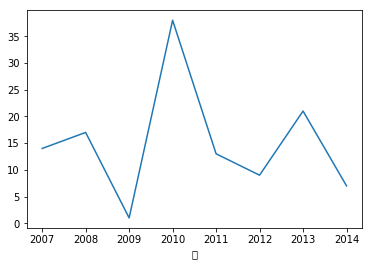

In [7]:
# 気温が30度越えのデータを調べる
atui_bool = (df["気温"] > 30)
atui = df[atui_bool]
# 年毎にカウント
cnt = atui.groupby(["年"])["年"].count()
# 出力
print(cnt)
cnt.plot()

この結果から2010年は暑かったことがわかります。

# 回帰分析で明日の気温を予測してみよう
気象データに理解が深まったところで機械学習を用いて気温の予測をしてみましょう。
2013年から2017年までを学習用データとして利用します。

6日間の過去データを入れると、翌日の気温を予測できる

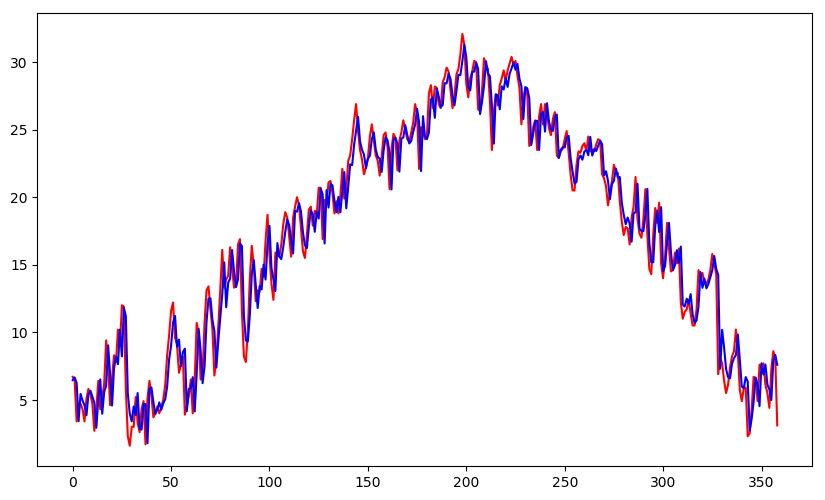

In [16]:
from sklearn import linear_model 
import matplotlib.pyplot as plt
train_year = (df["年"] <= 2013)
test_year = (df["年"] >= 2014)
interval = 6

#　過去6日分を学習するデータを作成
def make_data(data):
    x = [] #学習データ
    y = [] #結果
    temps = list(data["気温"])
    for i in range(len(temps)):
        if i <= interval: continue
        y.append(temps[i])
        xa = []
        for p in range(interval):
            d = i + p - interval
            xa.append(temps[d])
        x.append(xa)
    return (x, y)

train_x, train_y = make_data(df[train_year])
test_x, test_y = make_data(df[test_year])

#　直線回帰分析を行う
lr = linear_model.LinearRegression(normalize=True)

lr.fit(train_x, train_y) #学習

pre_y = lr.predict(test_x) #学習

# 結果を図にプロット
plt.figure(figsize=(10, 6), dpi=100)
plt.plot(test_y, c='r')
plt.plot(pre_y, c='b')
plt.show()

プログラムを実行すると図が表示されました。青色が予測した気温で赤色が実際の気温です。この結果を見ると大きくはずれていないようです。

## 実行結果を評価してみよう
予測した気温と実際の気温が大体合致しているのがわかりますが、どの程度合致しているのか数値で確かめます。上記のプログラムを記述して、確かめてみましょう。
変数pre_yには、機械学習により予測した気温の一覧が代入されています。そして、変数test_yには実際の気温が代入されています。
それでは各日の差を表示してみます。

In [17]:
diff_y = abs(pre_y - test_y)
print("average=", sum(diff_y) / len(diff_y))
print("max=", max(diff_y))

average= 1.2596365056100776
max= 7.339481777609029


平均の誤差は1.26度となり、最大誤差は7.3度となる。

## 応用のヒント
ここで機械学習を応用できそうなテーマとして、「気温の変化とビールの売り上げ」などが考えられます。気温の変化とビールの売り上げなどが関連があり、気温から売り上げが予測できるといわれています。気温の予測プログラムでは過去6日の気温から翌日の気温を予測しました。ここで、翌日の気温ではなくビールの売り上げなどの要素を目的変数に指定するなら、さまざまな予測プログラムに応用できます。